# IMU

In [26]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data
The data recorded by SPLICE computer for the IMU.


In [27]:
df = pd.read_csv('../dataset/Data/dlc.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40001 entries, 0 to 40000
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TIME_NANOSECONDS_TAI   40001 non-null  float64
 1   DATA_DELTA_VEL[1]      40001 non-null  float64
 2   DATA_DELTA_VEL[2]      40001 non-null  float64
 3   DATA_DELTA_VEL[3]      40001 non-null  float64
 4   DATA_DELTA_ANGLE[1]    40001 non-null  float64
 5   DATA_DELTA_ANGLE[2]    40001 non-null  float64
 6   DATA_DELTA_ANGLE[3]    40001 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


### Preprocessing

Data seems to be very clean but column names have trailing spaces. We remove them.

In [28]:
df.isna().sum()

TIME_NANOSECONDS_TAI     0
DATA_DELTA_VEL[1]        0
DATA_DELTA_VEL[2]        0
DATA_DELTA_VEL[3]        0
DATA_DELTA_ANGLE[1]      0
DATA_DELTA_ANGLE[2]      0
DATA_DELTA_ANGLE[3]      0
dtype: int64

In [29]:
df.columns

Index(['TIME_NANOSECONDS_TAI ', 'DATA_DELTA_VEL[1] ', 'DATA_DELTA_VEL[2] ',
       'DATA_DELTA_VEL[3] ', 'DATA_DELTA_ANGLE[1] ', 'DATA_DELTA_ANGLE[2] ',
       'DATA_DELTA_ANGLE[3]'],
      dtype='object')

In [30]:
df.columns = df.columns.str.strip()
df.columns

Index(['TIME_NANOSECONDS_TAI', 'DATA_DELTA_VEL[1]', 'DATA_DELTA_VEL[2]',
       'DATA_DELTA_VEL[3]', 'DATA_DELTA_ANGLE[1]', 'DATA_DELTA_ANGLE[2]',
       'DATA_DELTA_ANGLE[3]'],
      dtype='object')

In [38]:
df["TIME_NANOSECONDS_TAI_DELTA"] = df["TIME_NANOSECONDS_TAI"].diff()
df["TIME_NANOSECONDS_TAI_DELTA"].describe()

count    4.000000e+04
mean     1.999999e+07
std      8.775108e+05
min      7.490048e+06
25%      1.999002e+07
50%      2.000000e+07
75%      2.000998e+07
max      3.249997e+07
Name: TIME_NANOSECONDS_TAI_DELTA, dtype: float64

## Exploration

### Time series 
Let's analyse the data with respect to time.

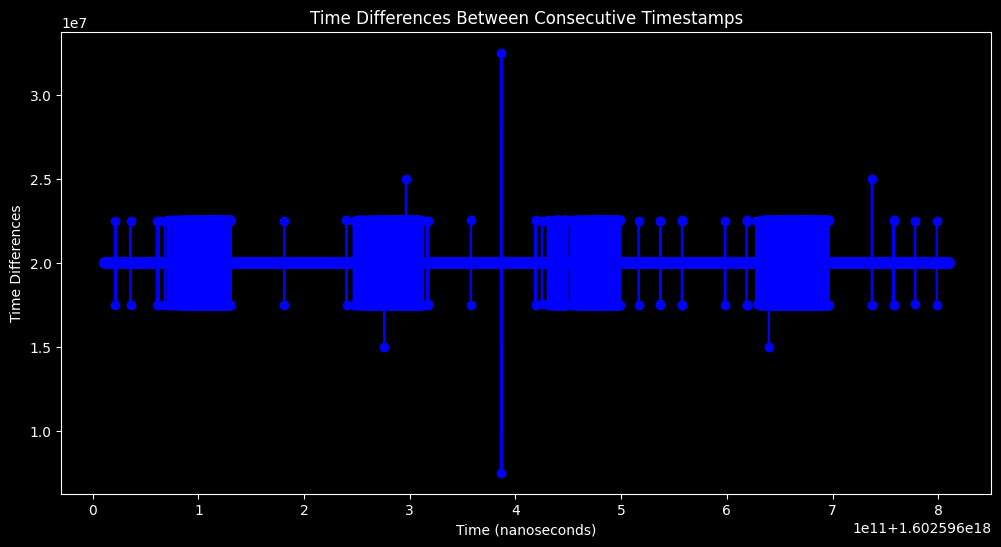

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(
    df["TIME_NANOSECONDS_TAI"],
    df["TIME_NANOSECONDS_TAI_DELTA"],
    marker="o",
    linestyle="-",
    color="b",
)
plt.title("Time Differences Between Consecutive Timestamps")
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Time Differences")
plt.show()

Large distribution of time deltas (not constant sampling rate), not a good sign but can be resampled if necessary.

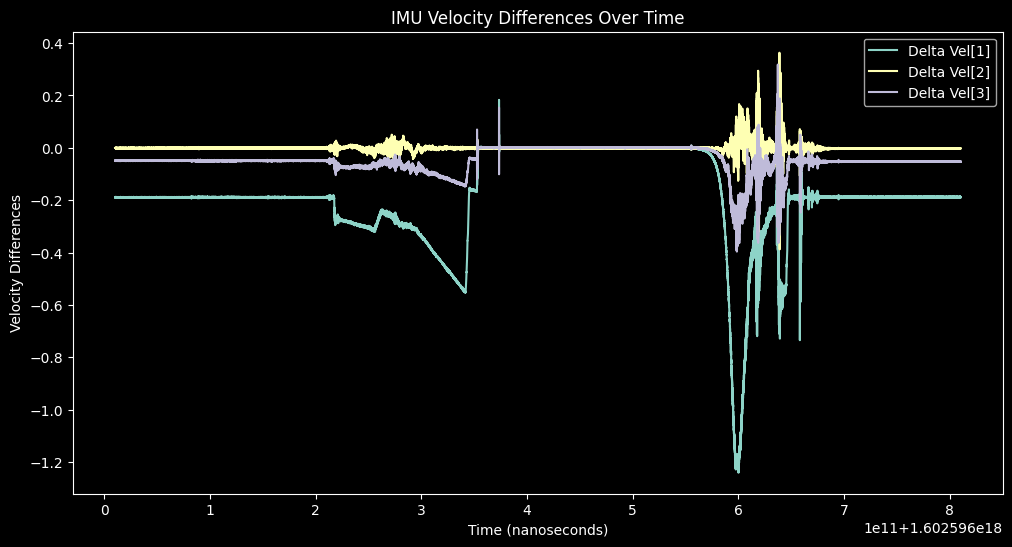

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df["TIME_NANOSECONDS_TAI"], df["DATA_DELTA_VEL[1]"], label="Delta Vel[1]")
plt.plot(df["TIME_NANOSECONDS_TAI"], df["DATA_DELTA_VEL[2]"], label="Delta Vel[2]")
plt.plot(df["TIME_NANOSECONDS_TAI"], df["DATA_DELTA_VEL[3]"], label="Delta Vel[3]")
plt.title("IMU Velocity Differences Over Time")
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Velocity Differences")
plt.legend()

Descent and landing phases are clearly visible with a smooth transition between each phase across all vels which is a good sign.

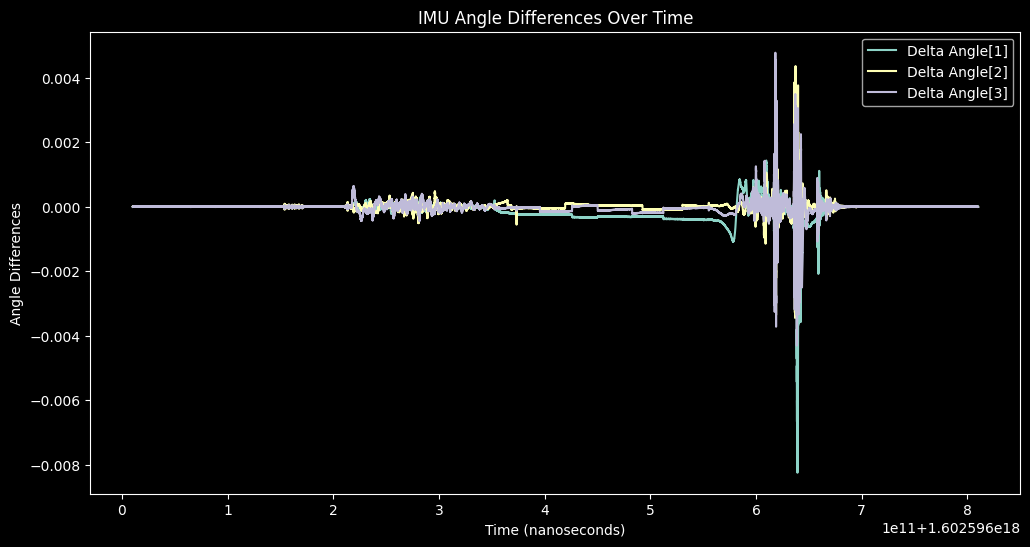

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df["TIME_NANOSECONDS_TAI"], df["DATA_DELTA_ANGLE[1]"], label="Delta Angle[1]")
plt.plot(df["TIME_NANOSECONDS_TAI"], df["DATA_DELTA_ANGLE[2]"], label="Delta Angle[2]")
plt.plot(df["TIME_NANOSECONDS_TAI"], df["DATA_DELTA_ANGLE[3]"], label="Delta Angle[3]")
plt.title("IMU Angle Differences Over Time")
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Angle Differences")
plt.legend()

Deorbit, descent and landing phases are very obvious here we can see some small shakes in the Angle[2] during deorbit and the other phases are clear.

### Comparative
Let's compare the values against each other to see if there is any correlation or not.

Text(0.5, 1.02, 'Pairplot of Velocity and Angle Differences')

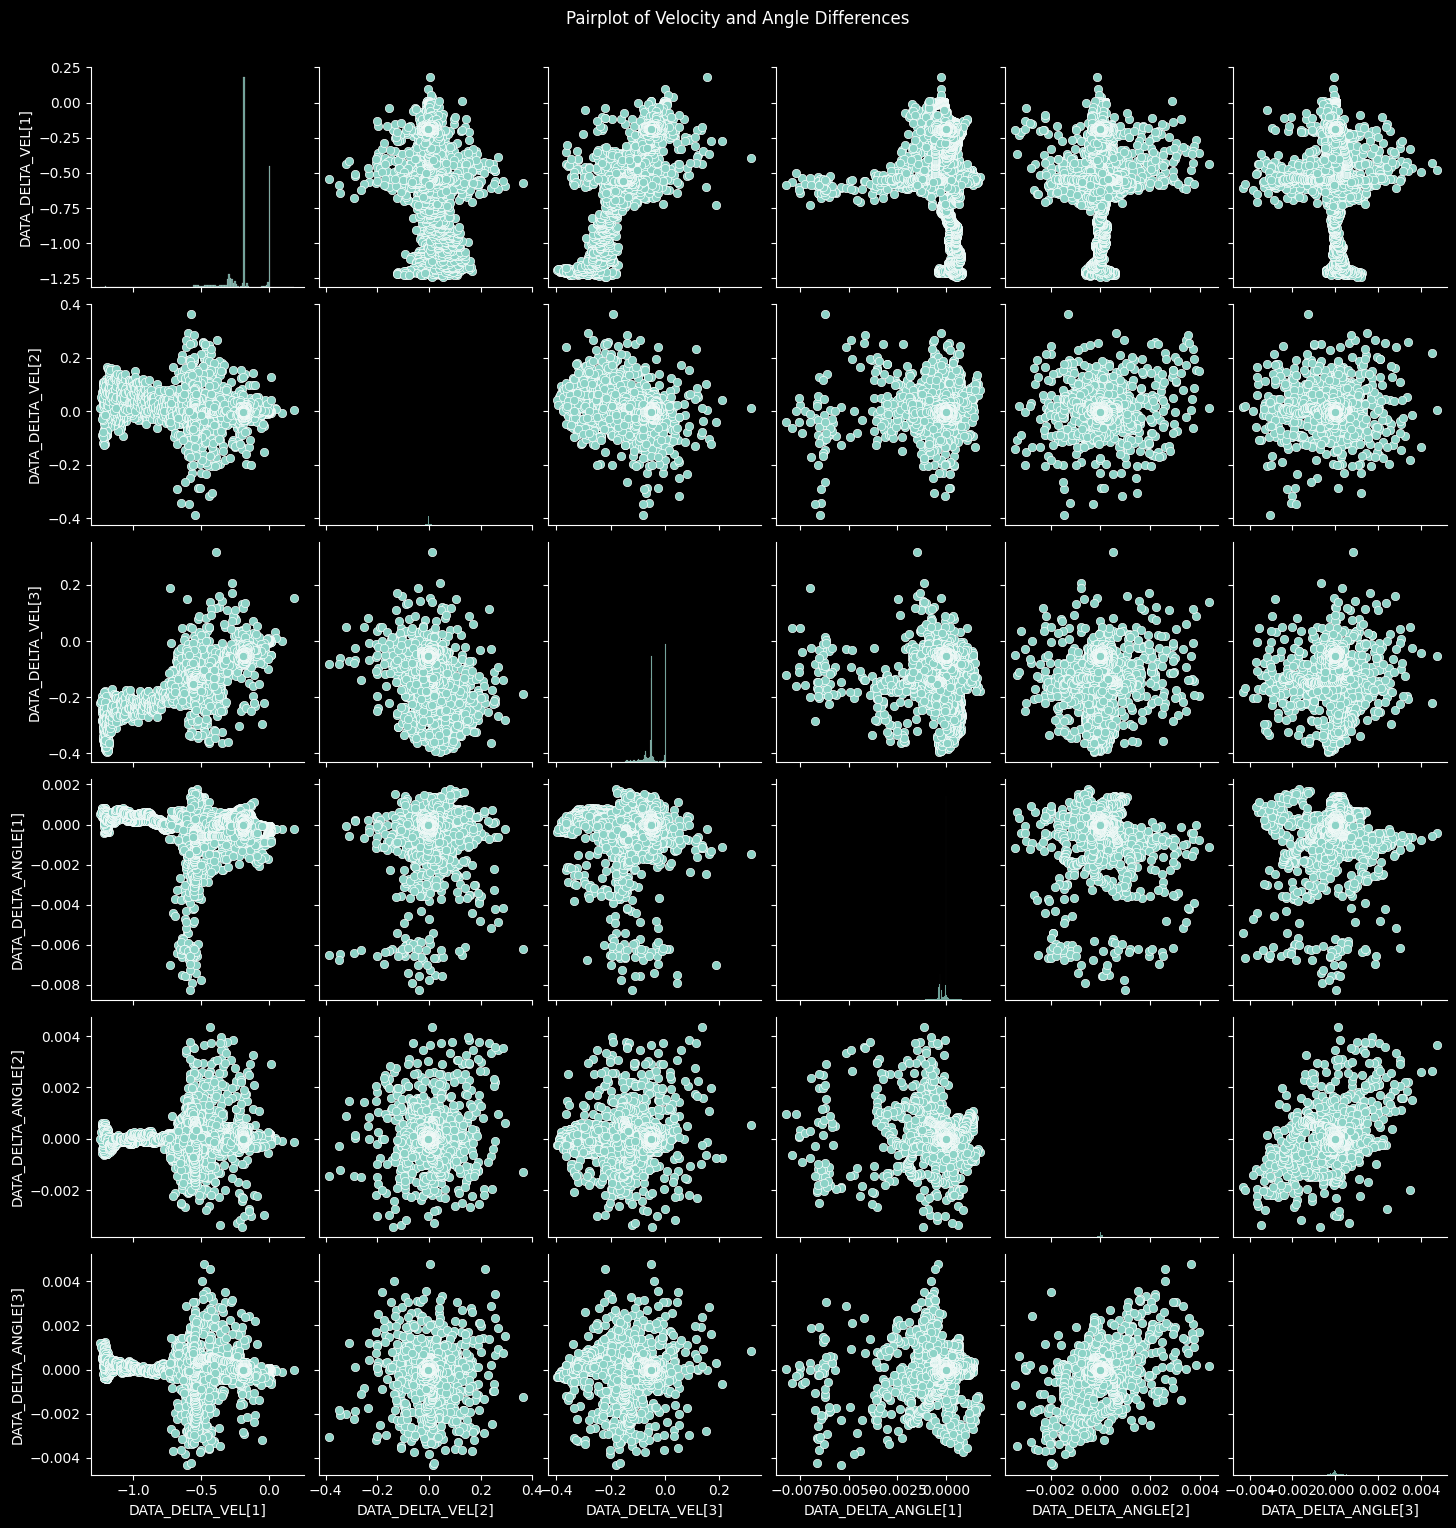

In [31]:
cols = [
    "DATA_DELTA_VEL[1]",
    "DATA_DELTA_VEL[2]",
    "DATA_DELTA_VEL[3]",
    "DATA_DELTA_ANGLE[1]",
    "DATA_DELTA_ANGLE[2]",
    "DATA_DELTA_ANGLE[3]",
]

sns.pairplot(df[cols])
plt.suptitle("Pairplot of Velocity and Angle Differences", y=1.02)

Distributions appear as expected, no strong correlation visibile. Clusters of relation are strong with some outliers. Also some pairs look like a plane which is nice.

Text(0.5, 1.0, 'Correlation Heatmap')

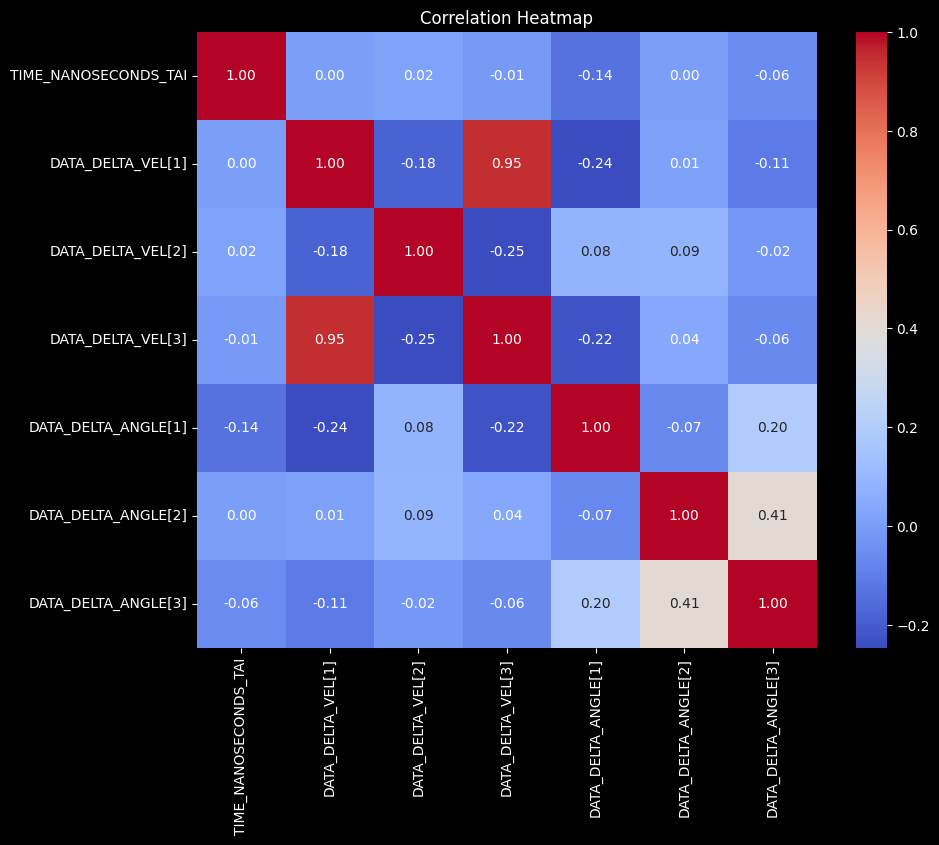

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

VEL[1] and VEL[2] are correlated strongly but could be circumstantial. No clear correlation between most of the values (A good thing as we want to have independent variables)

### Distribution
How does the data look across the board?

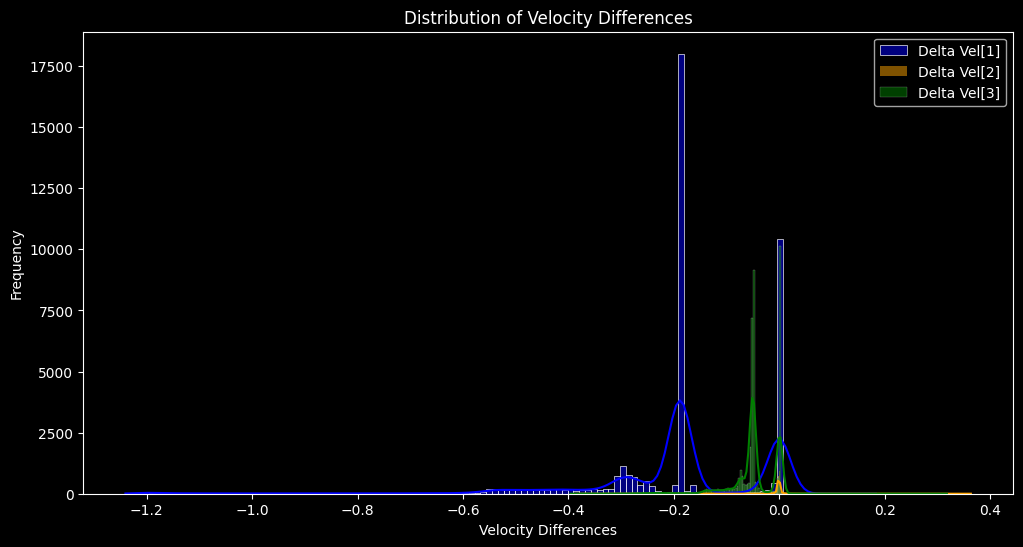

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df["DATA_DELTA_VEL[1]"], kde=True, label="Delta Vel[1]", color="blue")
sns.histplot(df["DATA_DELTA_VEL[2]"], kde=True, label="Delta Vel[2]", color="orange")
sns.histplot(df["DATA_DELTA_VEL[3]"], kde=True, label="Delta Vel[3]", color="green")
plt.title("Distribution of Velocity Differences")
plt.xlabel("Velocity Differences")
plt.ylabel("Frequency")
plt.legend()

Velocity dist shows deorbit, descent and landing clearly

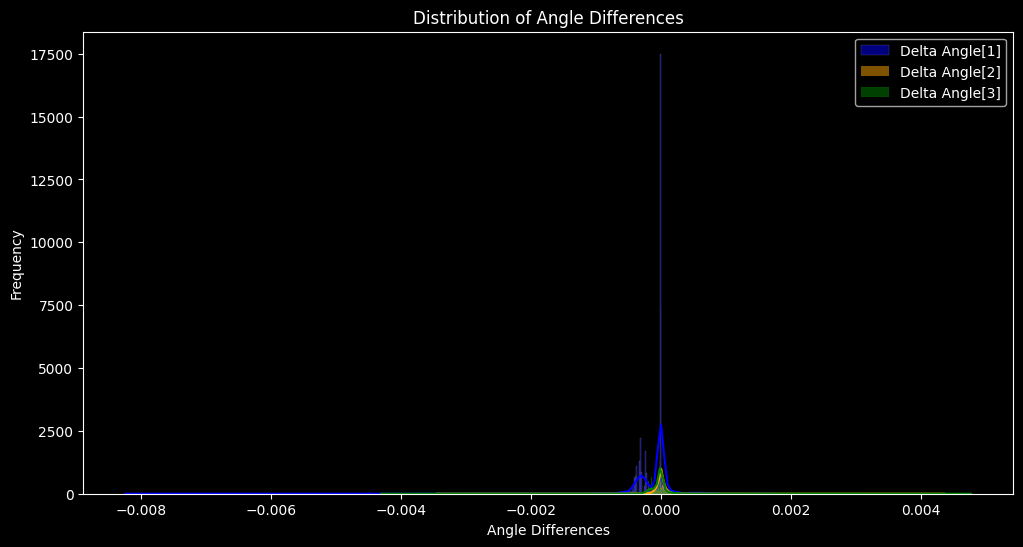

In [34]:
plt.figure(figsize=(12, 6))

sns.histplot(
    df["DATA_DELTA_ANGLE[1]"], kde=True, label="Delta Angle[1]", color="blue"
)
sns.histplot(
    df["DATA_DELTA_ANGLE[2]"], kde=True, label="Delta Angle[2]", color="orange"
)
sns.histplot(
    df["DATA_DELTA_ANGLE[3]"], kde=True, label="Delta Angle[3]", color="green"
)

plt.title("Distribution of Angle Differences")
plt.xlabel("Angle Differences")
plt.ylabel("Frequency")
plt.legend()

Angle dist is hard to read but shows a clear spike at the end (landing)